## Lecture 10

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

## Simple Linear Regression

First, let's implement the tools we'll need for regression.

In [2]:
def standard_units(x):
    return (x - np.mean(x)) / np.std(x)

def correlation(x, y):
    return np.mean(standard_units(x) * standard_units(y))

Let's read in our data. The data is based on the famous 1885 study of Francis Galton exploring the relationship between the heights of adult children and the heights of their parents (*Regression towards Mediocrity*, 1885: [JSTOR link](https://www.jstor.org/stable/2841583)).

In [3]:
df = pd.read_csv('galton.csv')
df

parent  child
0     75.43   73.2
1     75.43   69.2
2     75.43   69.0
3     75.43   69.0
4     73.66   73.5
..      ...    ...
929   66.64   64.0
930   66.64   62.0
931   66.64   61.0
932   65.27   66.5
933   65.27   57.0

[934 rows x 2 columns]

In [4]:
np.mean(df['parent']), np.mean(df['child'])

(69.20677301927185, 66.74593147751597)

In [5]:
fig = px.scatter(df, x= 'parent', y = 'child')
fig.show()

Using our `correlation` function:

In [6]:
correlation(df['parent'], df['child'])

0.320949896063959

Using an in-built `correlation` function:
* The matrix elements are symmetric: elements are correlations of (x, x), (x, y), (y, x), and (y, y).
* NumPy and pandas functions.

In [7]:
np.corrcoef(df['parent'], df['child'])

array([[1.       , 0.3209499],
       [0.3209499, 1.       ]])

In [8]:
df.corr()

parent    child
parent  1.00000  0.32095
child   0.32095  1.00000

In [9]:
def slope(x, y):
    return correlation(x, y) * np.std(y) / np.std(x)

def intercept(x, y):
    return np.mean(y) - slope(x, y)*np.mean(x)

In [10]:
ahat = intercept(df['parent'], df['child'])
bhat = slope(df['parent'], df['child'])

print("predicted y = {} + {} * average parent's height".format(np.round(ahat, 2), np.round(bhat, 2)))

predicted y = 22.64 + 0.64 * average parent's height


Let's see what our linear model looks like.

In [11]:
fig = go.Figure()
fig.add_trace(go.Scatter(x = df['parent'], y = df['child'], mode = 'markers', name = 'actual'))
fig.add_trace(go.Scatter(x = df['parent'], y = ahat + bhat*df['parent'], name = 'linear model', line=dict(color='red')))


fig.update_layout(xaxis_title = 'MidParent Height', yaxis_title = 'Child Height')

Note: The cool thing about plotly is that you can hover over the points and it will tell you whether it is a prediction or actual value.

# Evaluating the Model

In [12]:
# helper functions
def fit_least_squares(x, y):
    ahat = intercept(x, y)
    bhat = slope(x, y)
    return ahat, bhat

def predict(x, ahat, bhat):
    return ahat + bhat*x

def compute_mse(y, yhat):
    return np.mean((y - yhat)**2)

Below we define `least_squares_evaluation` which:
* Computes general data statistics like mean, standard deviation, and linear correlation $r$
* Fits least squares to data of the form $(x, y)$
* Computes performance metrics like RMSE
* Optionally plots two visualizations:
    * Original scatter plot with fitted line
    * Residual plot

In [13]:
plt.style.use('default') # revert style to default mpl
NO_VIZ, RESID, RESID_SCATTER = range(3)
def least_squares_evaluation(x, y, visualize=NO_VIZ):
    # statistics
    print(f"x_mean : {np.mean(x):.2f}, y_mean : {np.mean(y):.2f}")
    print(f"x_stdev: {np.std(x):.2f}, y_stdev: {np.std(y):.2f}")
    print(f"r = Correlation(x, y): {correlation(x, y):.3f}")
    
    # performance metrics
    ahat, bhat = fit_least_squares(x, y)
    yhat = predict(x, ahat, bhat)
    print(f"ahat: {ahat:.2f}, bhat: {bhat:.2f}")
    print(f"RMSE: {np.sqrt(compute_mse(y, yhat)):.3f}")

    # visualization
    fig, ax_resid = None, None
    if visualize == RESID_SCATTER:
        fig, axs = plt.subplots(1,2,figsize=(8, 3))
        axs[0].scatter(x, y)
        axs[0].plot(x, yhat)
        axs[0].set_title("LS fit")
        ax_resid = axs[1]
    elif visualize == RESID:
        fig = plt.figure(figsize=(4, 3))
        ax_resid = plt.gca()
    
    if ax_resid is not None:
        ax_resid.scatter(x, y - yhat, color = 'red')
        ax_resid.plot([4, 14], [0, 0], color = 'black')
        ax_resid.set_title("Residuals")
    
    return fig

Let's first try just doing linear fit *without* visualizing data.

**Note**: Computation without visualization is NOT a good practice! We are doing the three evaluation steps **out of order** to highlight the importance of visualization.

Here are the evaluation steps **in order**:
1. Visualize original data, compute statistics
2. If it seems reasonable, fit linear model
3. Finally, compute performance metrics of linear model and plot residuals and other visualizations

In [14]:

# Load in four different datasets: I, II, III, IV
anscombe = sns.load_dataset('anscombe')
anscombe['dataset'].value_counts()

IV     11
II     11
III    11
I      11
Name: dataset, dtype: int64

### Compute statistics and performance metrics only

In [15]:
for dataset in ['I', 'II', 'III', 'IV']:
    print(f">>> Dataset {dataset}:")
    ans = anscombe[anscombe['dataset'] == dataset]
    least_squares_evaluation(ans['x'], ans['y'], visualize=NO_VIZ)
    print()
    print()

>>> Dataset I:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
ahat: 3.00, bhat: 0.50
RMSE: 1.119


>>> Dataset II:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
ahat: 3.00, bhat: 0.50
RMSE: 1.119


>>> Dataset III:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
ahat: 3.00, bhat: 0.50
RMSE: 1.118


>>> Dataset IV:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.817
ahat: 3.00, bhat: 0.50
RMSE: 1.118




Wow, looks like all four datasets have the same:
* statistics of $x$ and $y$
* correlation $r$
* regression line parameters $\hat{a}, \hat{b}$
* RMSE (average squared loss)

### Plot Residuals

>>> Dataset I:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
ahat: 3.00, bhat: 0.50
RMSE: 1.119


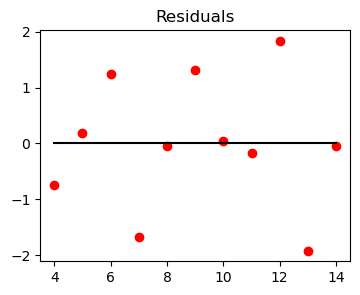



>>> Dataset II:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
ahat: 3.00, bhat: 0.50
RMSE: 1.119


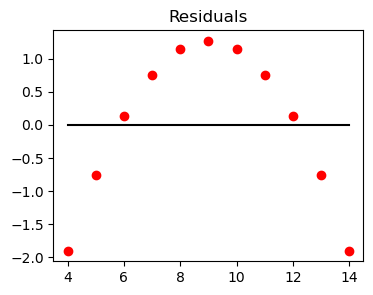



>>> Dataset III:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
ahat: 3.00, bhat: 0.50
RMSE: 1.118


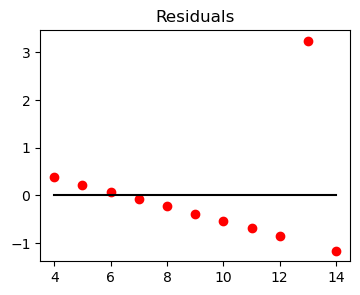



>>> Dataset IV:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.817
ahat: 3.00, bhat: 0.50
RMSE: 1.118


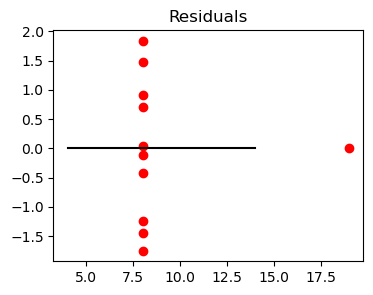

In [16]:
for dataset in ['I', 'II', 'III', 'IV']:
    print(f">>> Dataset {dataset}:")
    ans = anscombe[anscombe['dataset'] == dataset]
    fig = least_squares_evaluation(ans['x'], ans['y'], visualize=RESID)
    plt.show(fig)
    print()
    print()

### Visualize the original data (what we should have done at the beginning)

>>> Dataset I:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
ahat: 3.00, bhat: 0.50
RMSE: 1.119




>>> Dataset II:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
ahat: 3.00, bhat: 0.50
RMSE: 1.119




>>> Dataset III:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.816
ahat: 3.00, bhat: 0.50
RMSE: 1.118


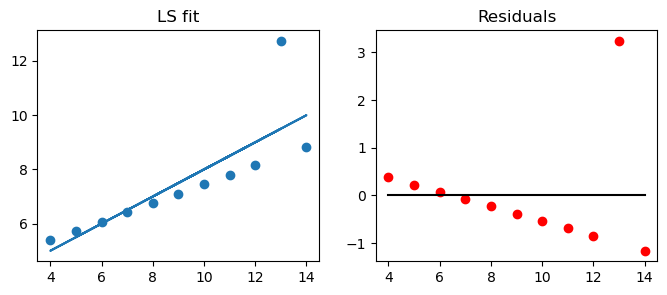



>>> Dataset IV:
x_mean : 9.00, y_mean : 7.50
x_stdev: 3.16, y_stdev: 1.94
r = Correlation(x, y): 0.817
ahat: 3.00, bhat: 0.50
RMSE: 1.118


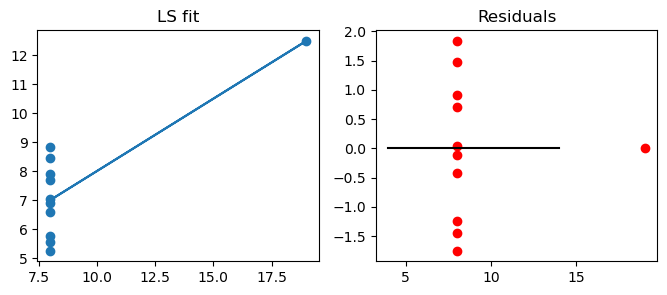

In [17]:
for dataset in ['I', 'II', 'III', 'IV']:
    print(f">>> Dataset {dataset}:")
    ans = anscombe[anscombe['dataset'] == dataset]
    fig = least_squares_evaluation(ans['x'], ans['y'], visualize=RESID_SCATTER)
    plt.show(fig)
    print()
    print()